# We linear regress Openings against the Results for different ELO ranges 

In [2]:
df_filt = pd.read_csv("openings.csv")

In [5]:
df_1300_1700 = df_filt[(df_filt['WhiteElo'] >= 1300) & (df_filt['WhiteElo'] <= 1700)]

In [8]:
df_1700_2100 = df_filt[(df_filt['WhiteElo'] > 1700) & (df_filt['WhiteElo'] <= 2100)]

In [10]:
df_2100_plus = df_filt[df_filt['WhiteElo'] > 2100]

In [12]:
df_1300_1700['Result'] = df_1300_1700['Result'].replace({'1-0': 1, '0-1': 0, '1/2-1/2': 0.5})
df_1700_2100['Result'] = df_1700_2100['Result'].replace({'1-0': 1, '0-1': 0, '1/2-1/2': 0.5})
df_2100_plus['Result'] = df_2100_plus['Result'].replace({'1-0': 1, '0-1': 0, '1/2-1/2': 0.5})

/var/folders/_c/q1m0k9bj5w111d5bhg0f1jn80000gq/T/ipykernel_36908/961288186.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1300_1700['Result'] = df_1300_1700['Result'].replace({'1-0': 1, '0-1': 0, '1/2-1/2': 0.5})
/var/folders/_c/q1m0k9bj5w111d5bhg0f1jn80000gq/T/ipykernel_36908/961288186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1300_1700['Result'] = df_1300_1700['Result'].replace({'1-0': 1, '0-1': 0, '1/2-1/2': 0.5})
/var/folders/_c/q1m0k9bj5w111d5bhg0f1jn80000gq/T/ipykernel_36908/961288186.py:2: F

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df_1300_1700 is already defined and contains 'Opening' and 'Result'

# Step 1: Prepare features and target variable
X = df_1300_1700[['Opening']]  # Feature: Opening
y = df_1300_1700['Result']     # Target: Result

# Step 2: Set up a pipeline with OneHotEncoder and Linear Regression
# Use OneHotEncoder to convert categorical 'Opening' to numerical features
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('opening', OneHotEncoder(handle_unknown='ignore'), ['Opening'])  # Handle unknown categories
    ])),
    ('regressor', LinearRegression())  # Apply Linear Regression
])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the model
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model
print(f"Model score (R^2) on training data: {pipeline.score(X_train, y_train)}")
print(f"Model score (R^2) on testing data: {pipeline.score(X_test, y_test)}")

# Step 6: Make predictions on the test set
predictions = pipeline.predict(X_test)

# Optionally, print out the first few predictions
print("\nPredictions on test set:")
print(predictions[:10])  # Display first 10 predictions

# Step 7: You can also compare the predictions to the actual values if you wish
print("\nActual values vs Predictions on test set:")
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison.head())


Model score (R^2) on training data: 0.459103840682788
Model score (R^2) on testing data: -0.0024095999999980133

Predictions on test set:
[ 2.52000000e-01  2.52000000e-01  2.50000000e-01  2.52000000e-01
 -8.32667268e-16  2.50000000e-01  1.00000000e+00  2.50000000e-01
 -8.88178420e-16  7.50000000e-01]

Actual values vs Predictions on test set:
      Actual     Predicted
444      0.0  2.520000e-01
492      0.0  2.520000e-01
1652     1.0  2.500000e-01
567      0.0  2.520000e-01
1716     0.0 -8.326673e-16


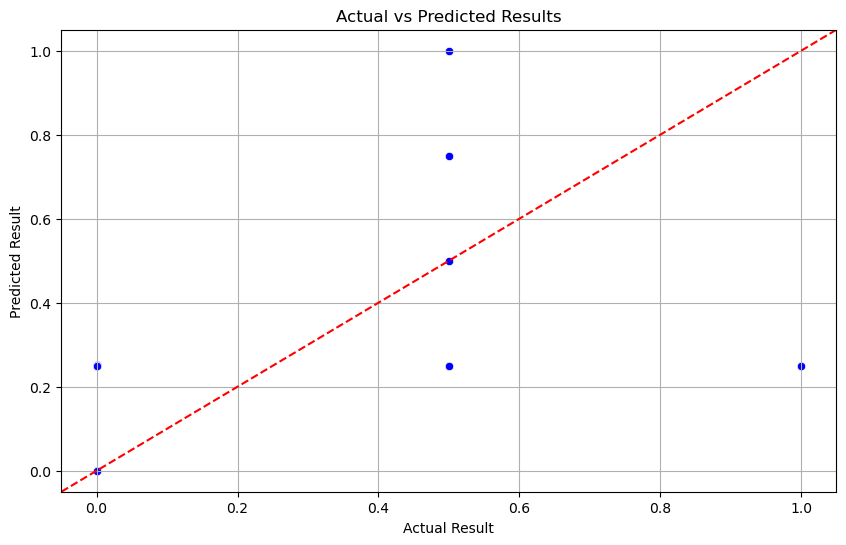

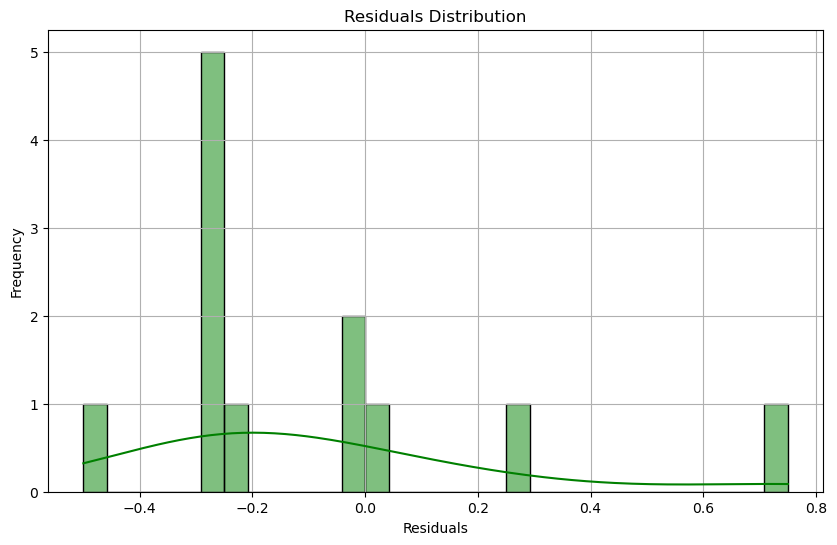

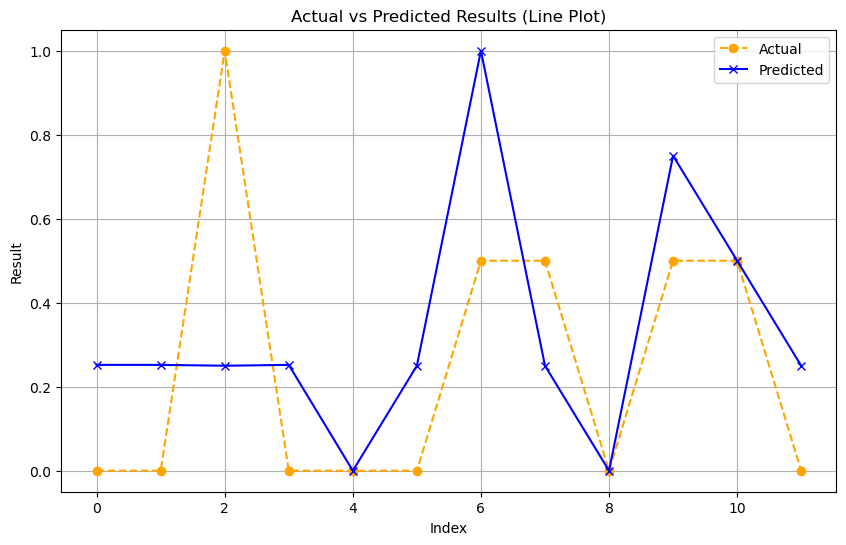

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have the 'pipeline' fitted and the predictions made on X_test

# Step 1: Create a DataFrame to compare Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Step 2: Plot Actual vs Predicted (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison, color='blue')
plt.title('Actual vs Predicted Results')
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a line for perfect predictions
plt.grid(True)
plt.show()

# Step 3: Plot residuals (difference between Actual and Predicted)
residuals = comparison['Actual'] - comparison['Predicted']

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: (Optional) Plot actual vs predicted as a line plot for visualizing trends
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual'].values, label='Actual', marker='o', linestyle='--', color='orange')
plt.plot(comparison['Predicted'].values, label='Predicted', marker='x', linestyle='-', color='blue')
plt.title('Actual vs Predicted Results (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Result')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df_1300_1700 is already defined and contains 'Opening' and 'Result'

# Step 1: Prepare features and target variable
X = df_1700_2100[['Opening']]  # Feature: Opening
y = df_1700_2100['Result']     # Target: Result

# Step 2: Set up a pipeline with OneHotEncoder and Linear Regression
# Use OneHotEncoder to convert categorical 'Opening' to numerical features
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('opening', OneHotEncoder(handle_unknown='ignore'), ['Opening'])  # Handle unknown categories
    ])),
    ('regressor', LinearRegression())  # Apply Linear Regression
])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the model
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model
print(f"Model score (R^2) on training data: {pipeline.score(X_train, y_train)}")
print(f"Model score (R^2) on testing data: {pipeline.score(X_test, y_test)}")

# Step 6: Make predictions on the test set
predictions = pipeline.predict(X_test)

# Optionally, print out the first few predictions
print("\nPredictions on test set:")
print(predictions[:10])  # Display first 10 predictions

# Step 7: You can also compare the predictions to the actual values if you wish
print("\nActual values vs Predictions on test set:")
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison.head())


Model score (R^2) on training data: 0.2606627248879404
Model score (R^2) on testing data: -0.2382172839022052

Predictions on test set:
[0.32352932 0.27777723 0.59999967 0.41666779 0.43846152 0.27777723
 0.43846152 0.43693276 0.50000048 0.3157894 ]

Actual values vs Predictions on test set:
      Actual  Predicted
544      1.0   0.323529
1760     0.5   0.277777
1701     0.0   0.600000
489      0.5   0.416668
2163     0.5   0.438462


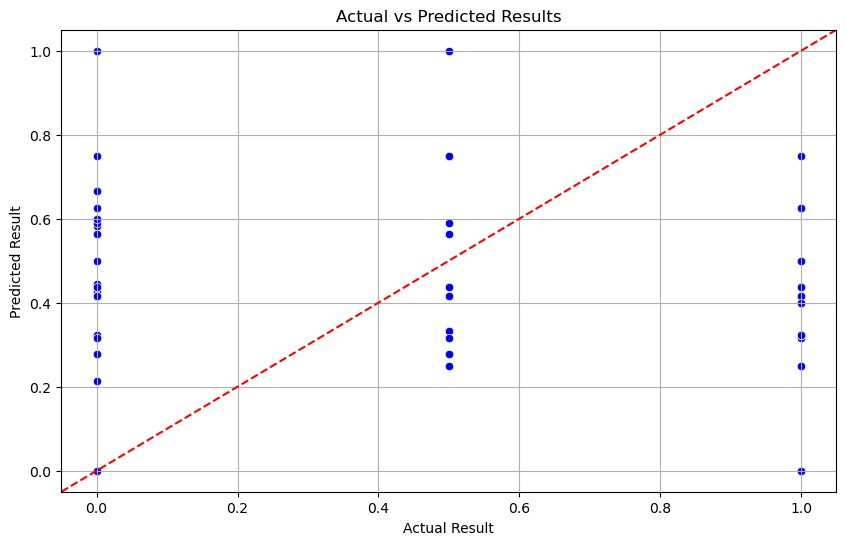

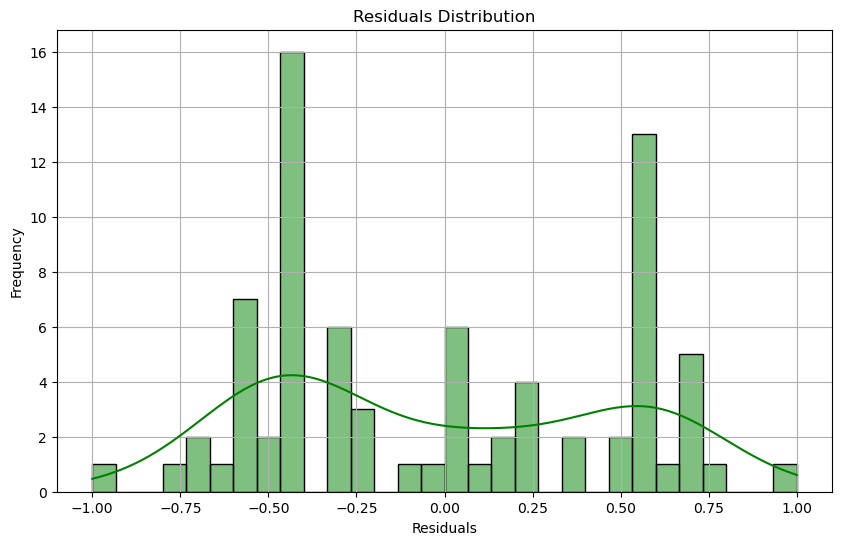

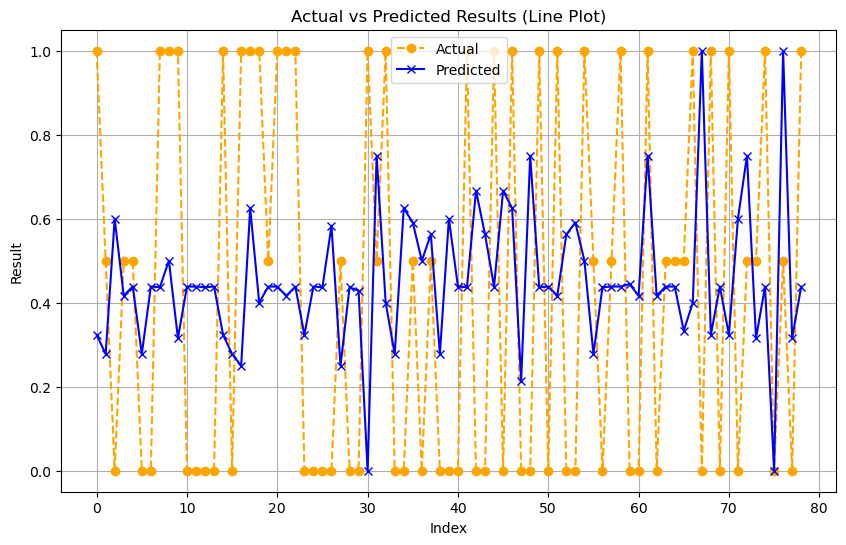

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have the 'pipeline' fitted and the predictions made on X_test

# Step 1: Create a DataFrame to compare Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Step 2: Plot Actual vs Predicted (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison, color='blue')
plt.title('Actual vs Predicted Results')
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a line for perfect predictions
plt.grid(True)
plt.show()

# Step 3: Plot residuals (difference between Actual and Predicted)
residuals = comparison['Actual'] - comparison['Predicted']

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: (Optional) Plot actual vs predicted as a line plot for visualizing trends
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual'].values, label='Actual', marker='o', linestyle='--', color='orange')
plt.plot(comparison['Predicted'].values, label='Predicted', marker='x', linestyle='-', color='blue')
plt.title('Actual vs Predicted Results (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Result')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df_1300_1700 is already defined and contains 'Opening' and 'Result'

# Step 1: Prepare features and target variable
X = df_2100_plus[['Opening']]  # Feature: Opening
y = df_2100_plus['Result']     # Target: Result

# Step 2: Set up a pipeline with OneHotEncoder and Linear Regression
# Use OneHotEncoder to convert categorical 'Opening' to numerical features
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('opening', OneHotEncoder(handle_unknown='ignore'), ['Opening'])  # Handle unknown categories
    ])),
    ('regressor', LinearRegression())  # Apply Linear Regression
])

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the model
pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model
print(f"Model score (R^2) on training data: {pipeline.score(X_train, y_train)}")
print(f"Model score (R^2) on testing data: {pipeline.score(X_test, y_test)}")

# Step 6: Make predictions on the test set
predictions = pipeline.predict(X_test)

# Optionally, print out the first few predictions
print("\nPredictions on test set:")
print(predictions[:10])  # Display first 10 predictions

# Step 7: You can also compare the predictions to the actual values if you wish
print("\nActual values vs Predictions on test set:")
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(comparison.head())


Model score (R^2) on training data: 0.08505529283790314
Model score (R^2) on testing data: -0.08897970153809243

Predictions on test set:
[0.5714287  0.65624979 0.57051171 0.57051171 0.61643872 0.61864396
 0.61864396 1.00000513 0.57051171 0.67999871]

Actual values vs Predictions on test set:
      Actual  Predicted
729      0.0   0.571429
1375     1.0   0.656250
758      0.0   0.570512
2110     0.0   0.570512
1453     0.0   0.616439


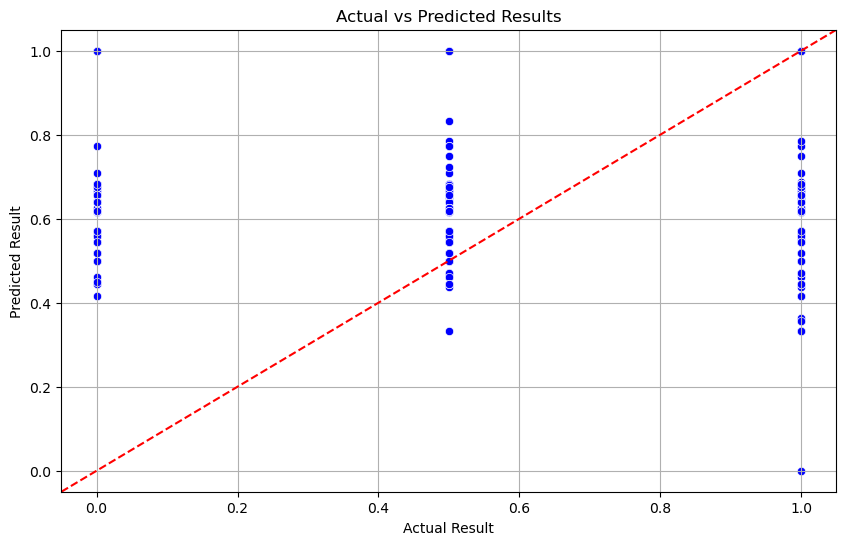

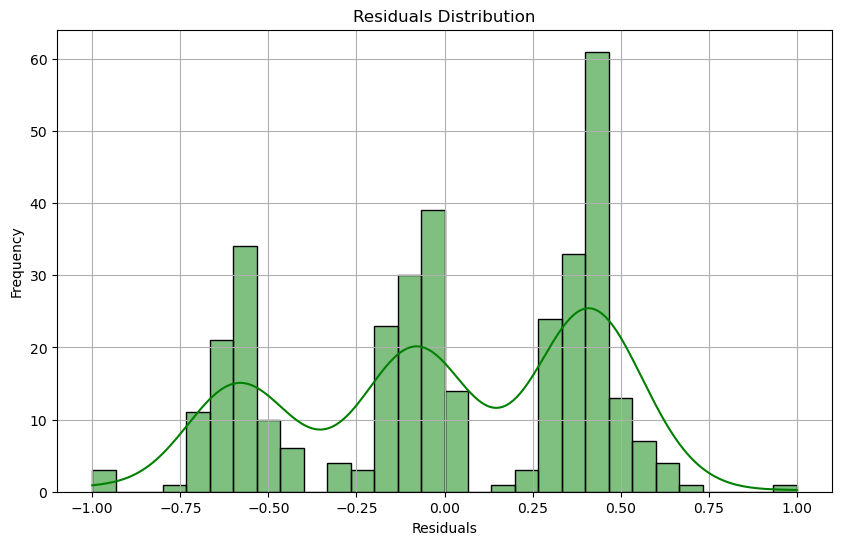

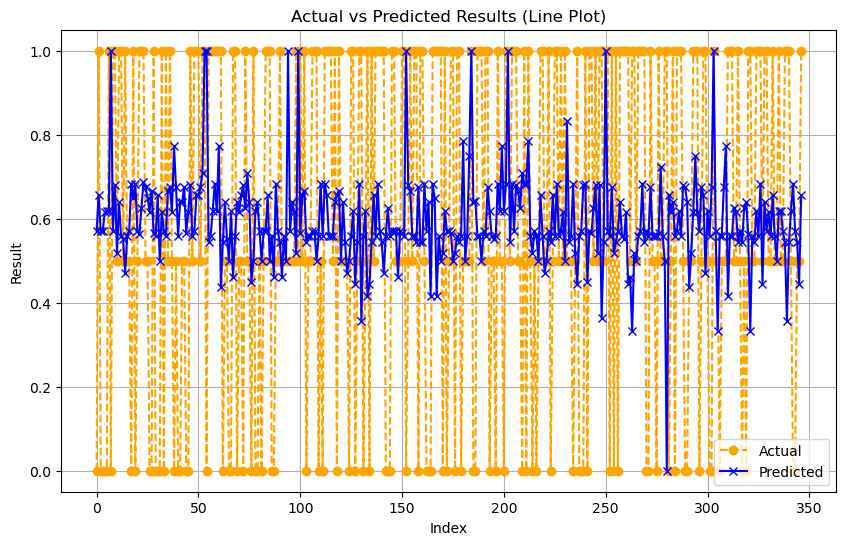

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have the 'pipeline' fitted and the predictions made on X_test

# Step 1: Create a DataFrame to compare Actual vs Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Step 2: Plot Actual vs Predicted (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison, color='blue')
plt.title('Actual vs Predicted Results')
plt.xlabel('Actual Result')
plt.ylabel('Predicted Result')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Add a line for perfect predictions
plt.grid(True)
plt.show()

# Step 3: Plot residuals (difference between Actual and Predicted)
residuals = comparison['Actual'] - comparison['Predicted']

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: (Optional) Plot actual vs predicted as a line plot for visualizing trends
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual'].values, label='Actual', marker='o', linestyle='--', color='orange')
plt.plot(comparison['Predicted'].values, label='Predicted', marker='x', linestyle='-', color='blue')
plt.title('Actual vs Predicted Results (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Result')
plt.legend()
plt.grid(True)
plt.show()
